In [1]:
#helping credit card companies determine 
#the most common warning signs for 
#people who are about to churn

#16.07% of the customers in the dataset churned

#18 features 
#analyze the features, determine which might be informative

from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt

df = pd.read_csv('BankChurners.csv')
df.drop_duplicates()
df.dropna()
#there are no duplicte rows or NaN values

##Removing unknown values in columns
indexNames = df[(df['Education_Level'] == 'Unknown') | (df['Marital_Status'] == 'Unknown') | (df['Income_Category'] == 'Unknown')].index
df.drop(indexNames , inplace=True)

#removing the last two columns (naive bayes), suggested by dataset owner

del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df

Populating the interactive namespace from numpy and matplotlib


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


Text(0, 0.5, 'Customers')

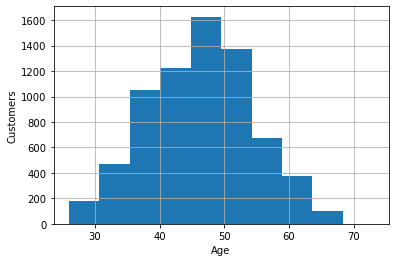

In [2]:
#histogram of age

df['Customer_Age'].hist()
xlabel('Age')
ylabel('Customers')

Text(0, 0.5, 'Customers')

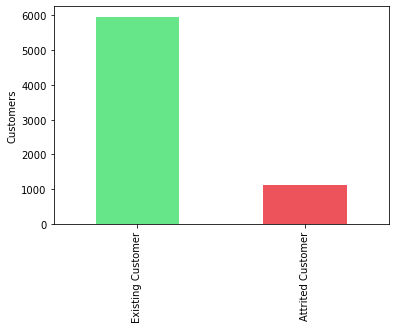

In [3]:
#creating a bar plot of attrition customers and existing customers

df['Attrition_Flag'].value_counts().plot(kind='bar', label='index', color=['#67e689', '#ed535b'])
ylabel('Customers')

#Existing customers: 5968
#Attrited Customers: 1113

#this might make training our model a bit more complicated

Text(0, 0.5, 'Customers')

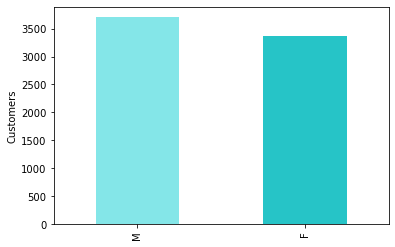

In [4]:
#exploration, males and females bar plot and value counts
df['Gender'].value_counts().plot(kind='bar', label='index', color=['#84e6e8','#26c4c7'])

df['Gender'].value_counts()
ylabel('Customers')

3    1929
2    1880
1    1274
4    1077
0     636
5     285
Name: Dependent_count, dtype: int64
Mean:  2.33780539471826


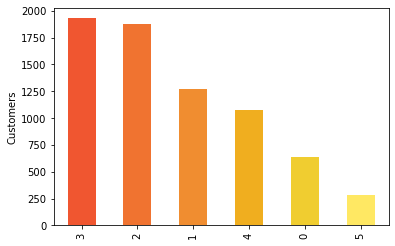

In [5]:
#exploration of dependant counts 
print(df['Dependent_count'].value_counts())

df['Dependent_count'].value_counts().plot(kind='bar', color = ['#f05630', '#f07330', '#f08d30','#f0ae1f','#f0cd30','#ffe863'])
ylabel('Customers')

print('Mean: ', df['Dependent_count'].mean())
#most people who have credit cards have some number of dependants
#Most people have an established family 

Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: Education_Level, dtype: int64


<AxesSubplot:ylabel='Education_Level'>

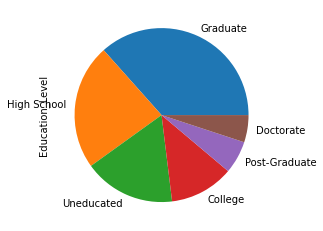

In [6]:
#exploratory analysis of education level
#most have some education
#it falls off a bit at college, post-grad and doctorate

print(df['Education_Level'].value_counts())
df['Education_Level'].value_counts().plot(kind='pie')


Married     3564
Single      2948
Divorced     569
Name: Marital_Status, dtype: int64


<AxesSubplot:ylabel='Marital_Status'>

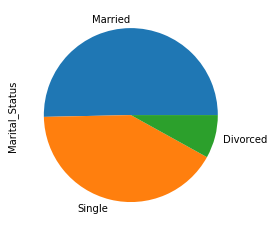

In [7]:
#exploratory analyis of marital status
print(df['Marital_Status'].value_counts())

df['Marital_Status'].value_counts().plot(kind='pie')

#most are married or single, a few divorced 

Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: Income_Category, dtype: int64


<AxesSubplot:>

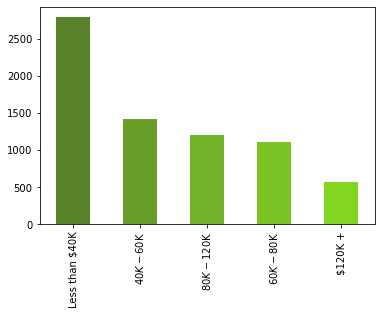

In [8]:
#income category exploratory analysis
print(df['Income_Category'].value_counts())

df['Income_Category'].value_counts().plot(kind='bar', label='index', color=['#588228','#689e29','#73b329','#7bc425','#83d620','#89e817'])

#makes sense, less people have more money

1438.3     375
34516.0    372
15987.0     14
9959.0      13
3735.0      10
2490.0      10
23981.0      8
6224.0       8
2001.0       7
2802.0       6
Name: Credit_Limit, dtype: int64


<AxesSubplot:>

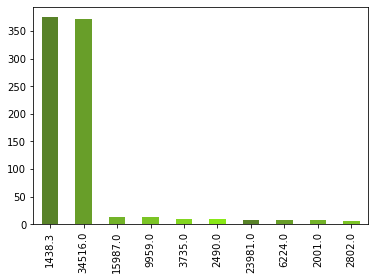

In [9]:
#credit limit value counts, top 10 most common limits
print(df['Credit_Limit'].value_counts().iloc[:10])

df['Credit_Limit'].value_counts().iloc[:10].plot(kind='bar', label='index', color=['#588228','#689e29','#73b329','#7bc425','#83d620','#89e817'])


#there are two limits that are overwhelmingly common (34516 and 1438), skewed to right side

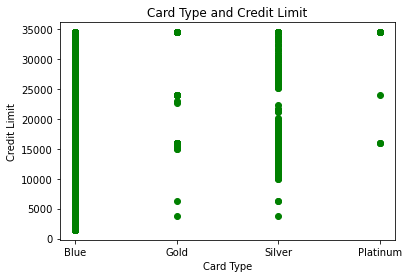

In [10]:
#scatterplot of credit limit against card type
plot(df['Card_Category'], df['Credit_Limit'], marker='o', color='green', linestyle='None')
xlabel('Card Type')
ylabel('Credit Limit')
title('Card Type and Credit Limit')
show()

#vast majority of people have blue cards, some have silver and very few have gold or platinum
#limit looks like it goes up a little with each sucessive card
#why is silver in front of gold


<AxesSubplot:>

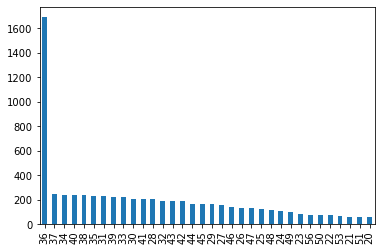

In [11]:
#exploratory analysis of months on book

df['Months_on_book'].value_counts().loc[:20].plot(kind='bar')

#MOST are 36 months
#goes from having to do something to get rid of card
#to having to do something to keep card

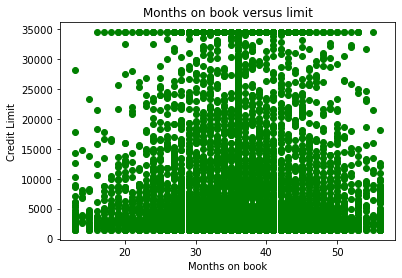

In [12]:
#scatterplot months with company versus book liimit
plot(df['Months_on_book'], df['Credit_Limit'], marker='o', color='green', linestyle='None')
xlabel('Months on book')
ylabel('Credit Limit')
title('Months on book versus limit')
show()


<AxesSubplot:>

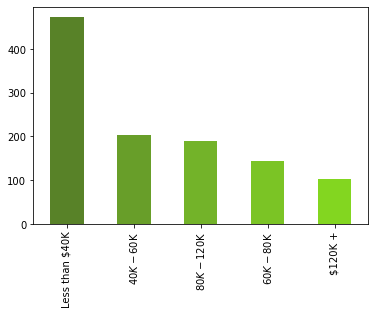

In [13]:
mask = df['Attrition_Flag']==('Attrited Customer')
attrited_df = df[mask]

attrited_df['Income_Category'].value_counts().plot(kind='bar', label='index', color=['#588228','#689e29','#73b329','#7bc425','#83d620','#89e817'])


<AxesSubplot:>

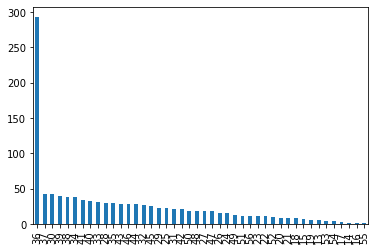

In [14]:
attrited_df['Months_on_book'].value_counts().plot(kind='bar')

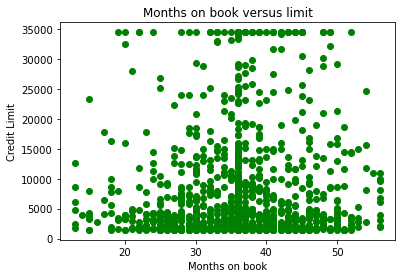

In [15]:
plot(attrited_df['Months_on_book'], attrited_df['Credit_Limit'], marker='o', color='green', linestyle='None')
xlabel('Months on book')
ylabel('Credit Limit')
title('Months on book versus limit')
show()

In [16]:
##new column to add numerical value if existing or attrited customer
df["Customer_Status"] = np.where(df["Attrition_Flag"] == "Attrited Customer",1,0)

<AxesSubplot:xlabel='Attrition_Flag'>

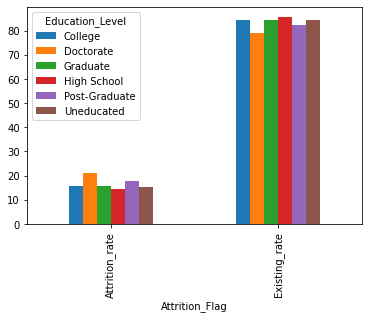

In [17]:
df_ed = pd.pivot_table(df, index = 'Education_Level', columns = 'Attrition_Flag', values = 'Customer_Status', aggfunc = 'count')
df_ed['Attrition_rate'] = (df_ed['Attrited Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed['Existing_rate'] = (df_ed['Existing Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100

df_ed3= df_ed[['Attrition_rate','Existing_rate']]
df_ed3.T.plot(kind='bar')

<AxesSubplot:xlabel='Attrition_Flag'>

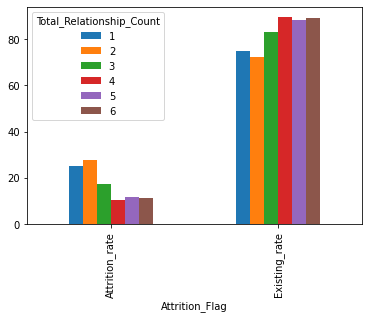

In [18]:
df_ed = pd.pivot_table(df, index = 'Total_Relationship_Count', columns = 'Attrition_Flag', values = 'Customer_Status', aggfunc = 'count')
df_ed['Attrition_rate'] = (df_ed['Attrited Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed['Existing_rate'] = (df_ed['Existing Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100

df_ed3= df_ed[['Attrition_rate','Existing_rate']]
df_ed3.T.plot(kind='bar')

<AxesSubplot:xlabel='Attrition_Flag'>

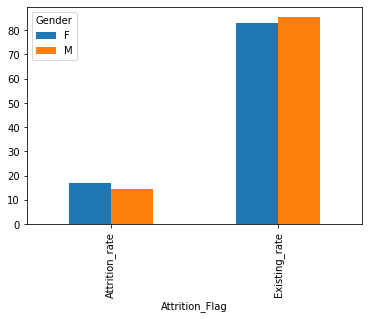

In [19]:
##Customer status based on gender
df_ed = pd.pivot_table(df, index = 'Gender', columns = 'Attrition_Flag', values = 'Customer_Status', aggfunc = 'count')
#df_ed_2 = pd.pivot_table(df, index = 'Attrition_Flag', columns = 'Gender', values = 'Customer Status', aggfunc = 'count')
df_ed['Attrition_rate'] = (df_ed['Attrited Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed['Existing_rate'] = (df_ed['Existing Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed3= df_ed[['Attrition_rate','Existing_rate']]

df_ed3.T.plot(kind='bar')

<AxesSubplot:xlabel='Attrition_Flag'>

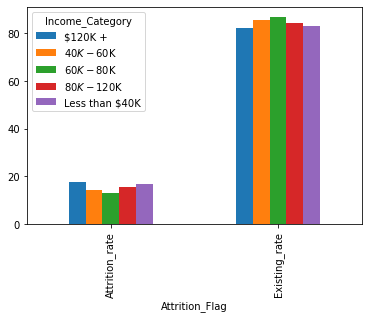

In [20]:
#Customer status based on income category
df_ed = pd.pivot_table(df, index = 'Income_Category', columns = 'Attrition_Flag', values = 'Customer_Status', aggfunc = 'count')
df_ed['Attrition_rate'] = (df_ed['Attrited Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed['Existing_rate'] = (df_ed['Existing Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed3= df_ed[['Attrition_rate','Existing_rate']]

df_ed3.T.plot(kind='bar')

<AxesSubplot:xlabel='Attrition_Flag'>

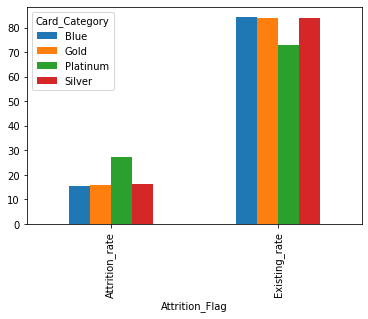

In [21]:
#Customer Status based on card category
df_ed = pd.pivot_table(df, index = 'Card_Category', columns = 'Attrition_Flag', values = 'Customer_Status', aggfunc = 'count')
df_ed['Attrition_rate'] = (df_ed['Attrited Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed['Existing_rate'] = (df_ed['Existing Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed3= df_ed[['Attrition_rate','Existing_rate']]

df_ed3.T.plot(kind='bar')

<AxesSubplot:xlabel='Attrition_Flag'>

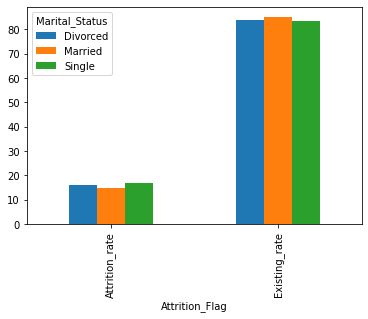

In [22]:
#Customer status based on marital status
df_ed = pd.pivot_table(df, index = 'Marital_Status', columns = 'Attrition_Flag', values = 'Customer_Status', aggfunc = 'count')
df_ed['Attrition_rate'] = (df_ed['Attrited Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed['Existing_rate'] = (df_ed['Existing Customer']/(df_ed['Attrited Customer'] + df_ed['Existing Customer']))*100
df_ed3= df_ed[['Attrition_rate','Existing_rate']]

df_ed3.T.plot(kind='bar')

In [23]:
df_imp_num = df[['Customer_Status','Months_on_book','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Avg_Utilization_Ratio']]

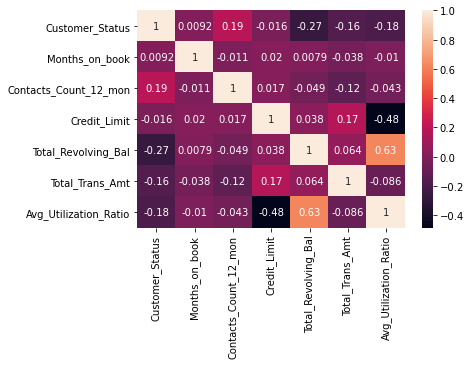

In [24]:
#Correlation matrix including only numerical variables
import seaborn as sn
corrMatrix = df_imp_num.corr()
sn.heatmap(corrMatrix,annot=True)
plt.show()

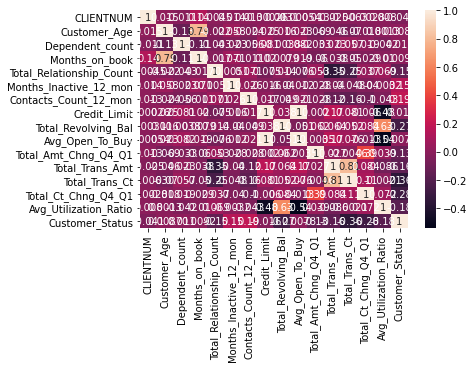

In [25]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix,annot=True)
plt.show()

In [26]:
#more exploratory analysis (heavily based on the above feature importances)

In [27]:
df2 = df.groupby(['Attrition_Flag'])[['Total_Trans_Ct', 'Total_Trans_Amt','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count']].agg(['mean'])[:10]

df2['avg transaction'] = df2['Total_Trans_Amt'] / df2['Total_Trans_Ct']
df2

#looks like average transaction size doesn't matter much
#but average utilization does

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Relationship_Count,avg transaction
,mean,mean,mean,mean,mean,mean,
Attrition_Flag,,,,,,,
Attrited Customer,44.807727,3106.296496,668.353998,0.556502,0.163571,3.298293,69.325019
Existing Customer,68.176441,4634.505529,1260.589980,0.740415,0.304458,3.916555,67.978109


In [28]:
df.groupby(['Attrition_Flag', "Card_Category"])[['Total_Trans_Ct', 'Total_Trans_Amt','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count']].agg(['mean'])[:10]

Total_Trans_Ct Total_Trans_Amt  \
                                          mean            mean   
Attrition_Flag    Card_Category                                  
Attrited Customer Blue               44.030948     2948.869439   
                  Gold               64.615385     6865.615385   
                  Platinum           60.666667     4820.000000   
                  Silver             52.714286     4832.761905   
Existing Customer Blue               67.298347     4452.831057   
                  Gold               88.691176     8604.426471   
                  Platinum          107.375000    12103.000000   
                  Silver             77.862805     6711.134146   

                                Total_Revolving_Bal Total_Ct_Chng_Q4_Q1  \
                                               mean                mean   
Attrition_Flag    Card_Category                                           
Attrited Customer Blue                   667.903288            0.551727   
                  Gold                   994.692308            0.661385   
                  Platinum               262.000000            0.532000   
                  Silver                 627.761905            0.614397   
Existing Customer Blue                  1255.982207            0.741533   
                  Gold                  1404.705882            0.721676   
                  Platinum              1780.500000            0.664875   
                  Silver                1296.195122            0.727189   

                                Avg_Utilization_Ratio Total_Relationship_Count  
                                                 mean                     mean  
Attrition_Flag    Card_Category                                                 
Attrited Customer Blue                       0.173677                 3.299807  
                  Gold                       0.039385                 3.615385  
                  Platinum                   0.012333                 3.333333  
                  Silver                     0.030540                 3.206349  
Existing Customer Blue                       0.321922                 3.953271  
                  Gold                       0.061456                 2.838235  
                  Platinum                   0.061000                 2.250000  
                  Silver                     0.064512                 3.557927

Text(0, 0.5, 'Transactions')

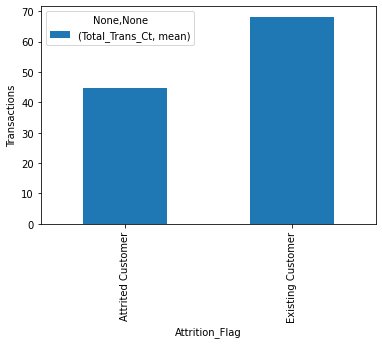

In [29]:
df.groupby(['Attrition_Flag'])[['Total_Trans_Ct']].agg(['mean'])[:10].plot(kind='bar')
ylabel("Transactions")

In [30]:
df.groupby(['Attrition_Flag', 'Marital_Status'])[['Total_Trans_Ct', 'Total_Trans_Amt','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count']].mean()[:10]

Total_Trans_Ct  Total_Trans_Amt  \
Attrition_Flag    Marital_Status                                    
Attrited Customer Divorced             45.217391      3153.032609   
                  Married              42.931947      2909.943289   
                  Single               46.747967      3308.676829   
Existing Customer Divorced             71.542977      4900.144654   
                  Married              64.570675      4383.465239   
                  Single               71.978420      4893.136401   

                                  Total_Revolving_Bal  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag    Marital_Status                                             
Attrited Customer Divorced                 715.467391             0.542587   
                  Married                  669.357278             0.547949   
                  Single                   658.465447             0.568301   
Existing Customer Divorced                1260.174004             0.739721   
                  Married                 1301.583855             0.740893   
                  Single                  1210.012622             0.739960   

                                  Avg_Utilization_Ratio  \
Attrition_Flag    Marital_Status                          
Attrited Customer Divorced                     0.145902   
                  Married                      0.166681   
                  Single                       0.163533   
Existing Customer Divorced                     0.296673   
                  Married                      0.317382   
                  Single                       0.289998   

                                  Total_Relationship_Count  
Attrition_Flag    Marital_Status                            
Attrited Customer Divorced                        3.326087  
                  Married                         3.351607  
                  Single                          3.235772  
Existing Customer Divorced                        3.926625  
                  Married                         3.953542  
                  Single                          3.868893

In [31]:
df.groupby(['Attrition_Flag', 'Dependent_count'])[['Total_Trans_Ct', 'Total_Trans_Amt','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count']].mean()[:10]

Total_Trans_Ct  Total_Trans_Amt  \
Attrition_Flag    Dependent_count                                    
Attrited Customer 0                     47.306931      3691.188119   
                  1                     45.375000      3281.407609   
                  2                     42.785965      2776.842105   
                  3                     43.878419      2955.036474   
                  4                     46.491228      3213.444444   
                  5                     50.325581      3897.976744   
Existing Customer 0                     63.882243      4240.570093   
                  1                     66.340367      4546.866972   
                  2                     69.048903      4779.265831   
                  3                     68.541875      4581.245625   

                                   Total_Revolving_Bal  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag    Dependent_count                                             
Attrited Customer 0                         615.792079             0.609129   
                  1                         644.369565             0.564609   
                  2                         718.150877             0.549635   
                  3                         659.155015             0.542547   
                  4                         699.543860             0.540813   
                  5                         510.744186             0.612884   
Existing Customer 0                        1240.244860             0.720751   
                  1                        1306.438532             0.733763   
                  2                        1232.947335             0.742291   
                  3                        1259.718125             0.740876   

                                   Avg_Utilization_Ratio  \
Attrition_Flag    Dependent_count                          
Attrited Customer 0                             0.156287   
                  1                             0.173777   
                  2                             0.173677   
                  3                             0.167195   
                  4                             0.151012   
                  5                             0.092256   
Existing Customer 0                             0.334310   
                  1                             0.332270   
                  2                             0.291861   
                  3                             0.289670   

                                   Total_Relationship_Count  
Attrition_Flag    Dependent_count                            
Attrited Customer 0                                3.326733  
                  1                                3.385870  
                  2                                3.185965  
                  3                                3.291793  
                  4                                3.456140  
                  5                                3.023256  
Existing Customer 0                                4.071028  
                  1                                4.014679  
                  2                                3.887774  
                  3                                3.900625

Text(0.5, 0, '')

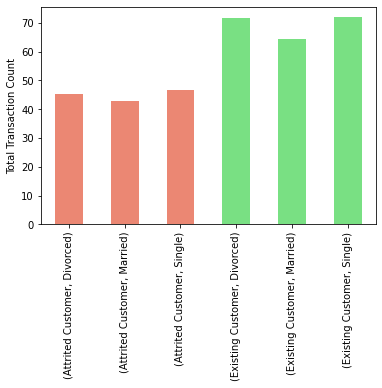

In [32]:
df.groupby(['Attrition_Flag', 'Marital_Status'])['Total_Trans_Ct'].mean()[:10].T.plot(kind='bar', color=['#eb8773','#eb8773','#eb8773','#79e083','#79e083','#79e083'])
ylabel('Total Transaction Count')
xlabel('')

#KEY QUESTION: is this because we stopped counting? lol

Text(0.5, 0, '')

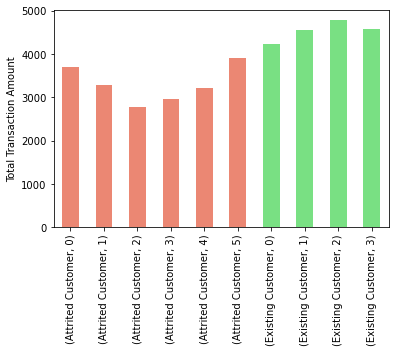

In [33]:
df.groupby(['Attrition_Flag', 'Dependent_count'])['Total_Trans_Amt'].mean()[:10].T.plot(kind='bar', color=['#eb8773','#eb8773','#eb8773','#eb8773','#eb8773','#eb8773','#79e083','#79e083','#79e083','#79e083'])
ylabel('Total Transaction Amount')
xlabel('')

Text(0.5, 0, '')

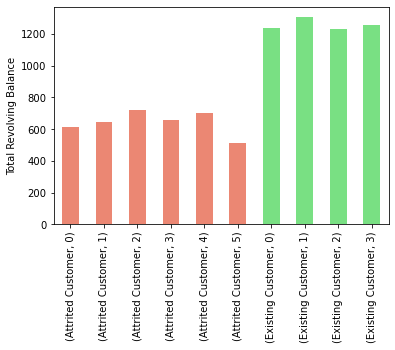

In [34]:
df.groupby(['Attrition_Flag','Dependent_count'])['Total_Revolving_Bal'].mean()[:10].plot(kind='bar', color=['#eb8773','#eb8773','#eb8773','#eb8773','#eb8773','#eb8773','#79e083','#79e083','#79e083','#79e083'])
ylabel('Total Revolving Balance')
xlabel('')

Text(0.5, 0, '')

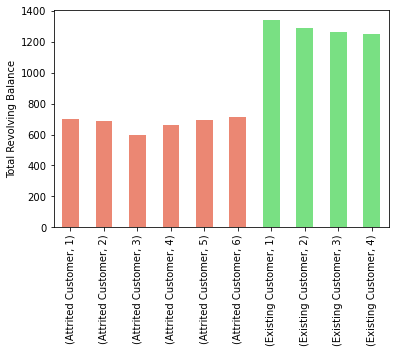

In [35]:
df.groupby(['Attrition_Flag','Total_Relationship_Count'])['Total_Revolving_Bal'].mean()[:10].plot(kind='bar', color=['#eb8773','#eb8773','#eb8773','#eb8773','#eb8773','#eb8773','#79e083','#79e083','#79e083','#79e083'])
ylabel('Total Revolving Balance')
xlabel('')

In [36]:
#generally, those who are in the "stay" category have

#higher total revolving balances (-.000813)
#higher transaction counts (-.117747)
#higher total transaction amounts (-.000004)
#similar average transactions 
#higher total ct change Q4 (-.0845)
#double the average utilization ratio (.01299) CONFLICTS
#marginally higher total relationship count (-.2448)

In [37]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
from sklearn.model_selection import train_test_split

#Convert gender to numerical
df = df.replace('F',1)
df = df.replace('M', 2)

#Convert education level to numerical
df = df.replace('Uneducated', 1)
df = df.replace('High School', 2)
df = df.replace('College', 3)
df = df.replace('Graduate', 4)
df = df.replace('Post-Graduate', 5)
df = df.replace('Doctorate', 6)


#Convert marital status to numerical
df = df.replace('$60K - $80K', 60)
df = df.replace('Less than $40K', 20)
df = df.replace('$80K - $120K', 80)
df = df.replace('$40K - $60K', 40)
df = df.replace('$120K +', 120)

#Convert card category to numerical

df = df.replace('Blue', 1)
df = df.replace('Silver', 2)
df = df.replace('Gold', 3)
df = df.replace('Platinum', 4)


Populating the interactive namespace from numpy and matplotlib


In [38]:
formula = 'Customer_Status ~ 0 + Customer_Age + C(Gender) + Dependent_count  + C(Education_Level)' +\
    ' + C(Marital_Status) + C(Income_Category) + C(Card_Category) + Months_on_book + Total_Relationship_Count' +\
    ' + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal' +\
    ' + Total_Amt_Chng_Q4_Q1 + Total_Trans_Amt + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1' +\
    ' + Avg_Utilization_Ratio'

Y, X = dmatrices(formula, df,return_type="dataframe")

In [39]:
!pip3 install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

y = Y['Customer_Status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [40]:
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
def cv_accuracy_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True).split(X, y)
    
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = sum(accuracies) * 1.0 / len(accuracies)
    
    return average_accuracy

#nearest neighbor = 1 and kfold = 10
cv_accuracy_score(X, y, nn=1)

0.8788332815376156

In [41]:
len(X_train)

8348

In [42]:
X_train.dtypes

C(Gender)[1]                    float64
C(Gender)[2]                    float64
C(Education_Level)[T.2]         float64
C(Education_Level)[T.3]         float64
C(Education_Level)[T.4]         float64
C(Education_Level)[T.5]         float64
C(Education_Level)[T.6]         float64
C(Marital_Status)[T.Married]    float64
C(Marital_Status)[T.Single]     float64
C(Income_Category)[T.40]        float64
C(Income_Category)[T.60]        float64
C(Income_Category)[T.80]        float64
C(Income_Category)[T.120]       float64
C(Card_Category)[T.2]           float64
C(Card_Category)[T.3]           float64
C(Card_Category)[T.4]           float64
Customer_Age                    float64
Dependent_count                 float64
Months_on_book                  float64
Total_Relationship_Count        float64
Months_Inactive_12_mon          float64
Contacts_Count_12_mon           float64
Credit_Limit                    float64
Total_Revolving_Bal             float64
Total_Amt_Chng_Q4_Q1            float64


In [43]:
X.dtypes

C(Gender)[1]                    float64
C(Gender)[2]                    float64
C(Education_Level)[T.2]         float64
C(Education_Level)[T.3]         float64
C(Education_Level)[T.4]         float64
C(Education_Level)[T.5]         float64
C(Education_Level)[T.6]         float64
C(Marital_Status)[T.Married]    float64
C(Marital_Status)[T.Single]     float64
C(Income_Category)[T.40]        float64
C(Income_Category)[T.60]        float64
C(Income_Category)[T.80]        float64
C(Income_Category)[T.120]       float64
C(Card_Category)[T.2]           float64
C(Card_Category)[T.3]           float64
C(Card_Category)[T.4]           float64
Customer_Age                    float64
Dependent_count                 float64
Months_on_book                  float64
Total_Relationship_Count        float64
Months_Inactive_12_mon          float64
Contacts_Count_12_mon           float64
Credit_Limit                    float64
Total_Revolving_Bal             float64
Total_Amt_Chng_Q4_Q1            float64


In [44]:
print(np.unique(y_train, return_counts=True))

(array([0., 1.]), array([4174, 4174]))


In [45]:
print(np.unique(y_test, return_counts=True))

(array([0., 1.]), array([1794,  331]))


In [47]:
len(y_train)

8348

In [48]:
len(X_test)

2125

In [49]:
len(y_test)

2125

In [50]:
# Build a list of multiple nn to cross validate knn
nn = [1] + [(x + 1) * 5 for x in range(19)]
scores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]


Text(0, 0.5, 'Accuracy of classifier')

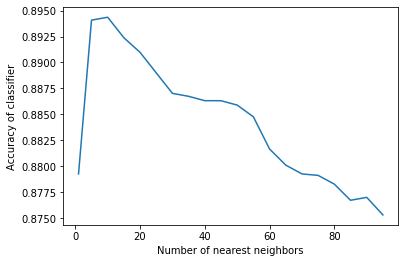

In [51]:
plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')

In [52]:
cv_accuracy_score(X, y, nn=10)

0.8940819408253848

In [ ]:
# model = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform')

# model.fit(X_train, y_train)

In [ ]:
#prediction_train = model.predict(X_train)

In [ ]:
#pd.crosstab(y_train, prediction_train)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

from sklearn import metrics

In [ ]:
# y = Y['Customer_Status'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
result = model_lr.fit(X_train, y_train)

from sklearn import metrics

prediction_train = model_lr.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.8291806420699569


/Users/soumikchoudhuri/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


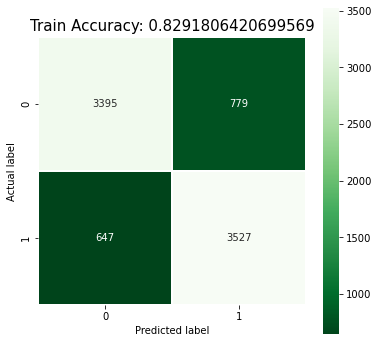

In [55]:
cm = confusion_matrix(y_train, prediction_train)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(metrics.accuracy_score(y_train, prediction_train),".3f")
plt.title(all_sample_title, size = 15);

In [56]:
report = classification_report(y_train, prediction_train)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83      4174
         1.0       0.82      0.84      0.83      4174

    accuracy                           0.83      8348
   macro avg       0.83      0.83      0.83      8348
weighted avg       0.83      0.83      0.83      8348



In [ ]:
# cm = confusion_matrix(y_train, prediction_train)

# fig, ax = plt.subplots(figsize=(4, 4))
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
#     for j in range(2):
#         ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

In [57]:
prediction = model_lr.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.8192941176470588


In [58]:
#from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction)

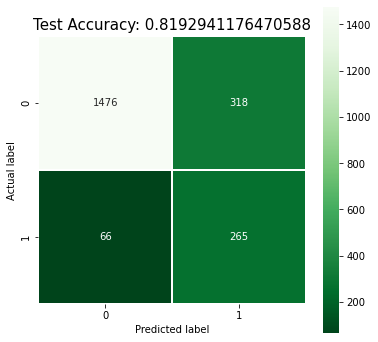

In [59]:

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(metrics.accuracy_score(y_test, prediction),".3f")
plt.title(all_sample_title, size = 15);

In [60]:
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      1794
         1.0       0.45      0.80      0.58       331

    accuracy                           0.82      2125
   macro avg       0.71      0.81      0.73      2125
weighted avg       0.88      0.82      0.84      2125



In [61]:
prediction = model_lr.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.8192941176470588


In [62]:
pd.crosstab(y_test,prediction)

col_0,0.0,1.0
row_0,,
0.0,1476,318
1.0,66,265


In [63]:
report = classification_report(y_train, prediction_train)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83      4174
         1.0       0.82      0.84      0.83      4174

    accuracy                           0.83      8348
   macro avg       0.83      0.83      0.83      8348
weighted avg       0.83      0.83      0.83      8348



In [ ]:


# cm = confusion_matrix(y_test, prediction)

# fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
#     for j in range(2):
#         ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

In [64]:
#feature weights

weights = Series(model_lr.coef_[0],
                 index=X.columns.values)
weights.sort_values()

Total_Relationship_Count       -0.277086
Total_Trans_Ct                 -0.122831
Total_Ct_Chng_Q4_Q1            -0.103451
C(Gender)[2]                   -0.079291
C(Marital_Status)[T.Married]   -0.063581
C(Income_Category)[T.60]       -0.054187
C(Income_Category)[T.80]       -0.011192
C(Education_Level)[T.2]        -0.009471
Total_Amt_Chng_Q4_Q1           -0.008098
Total_Revolving_Bal            -0.000954
Credit_Limit                   -0.000011
Total_Trans_Amt                 0.000504
C(Card_Category)[T.4]           0.005138
C(Card_Category)[T.2]           0.007203
C(Card_Category)[T.3]           0.008852
C(Income_Category)[T.40]        0.013552
C(Income_Category)[T.120]       0.022067
Avg_Utilization_Ratio           0.022935
C(Education_Level)[T.4]         0.023174
C(Education_Level)[T.5]         0.023545
Months_on_book                  0.023660
C(Education_Level)[T.3]         0.027203
C(Education_Level)[T.6]         0.030898
Customer_Age                    0.032631
C(Marital_Status

In [65]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

#Random Forest model
model_rf = RandomForestClassifier(random_state = 0, max_depth = 5)
model_rf.fit(X_train,y_train)
prediction = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))
#pd.crosstab(y_test,prediction)

0.9148235294117647


In [66]:
model_list = X.columns
feature_importance = pd.DataFrame(model_rf.feature_importances_, model_list, columns = ['importance']).sort_values('importance', ascending = False)
feature_importance

,importance
Total_Trans_Ct,0.229598
Total_Trans_Amt,0.186462
Total_Revolving_Bal,0.120386
Total_Ct_Chng_Q4_Q1,0.075906
Avg_Utilization_Ratio,0.071665
Months_Inactive_12_mon,0.057379
Contacts_Count_12_mon,0.048800
Total_Relationship_Count,0.045341
C(Marital_Status)[T.Single],0.025796
C(Marital_Status)[T.Married],0.025461


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

from sklearn import metrics

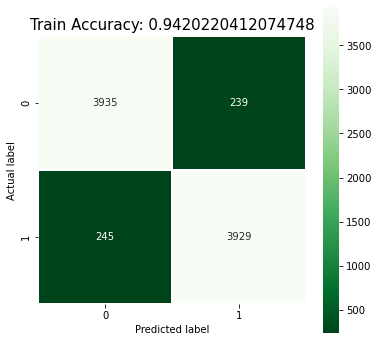

In [69]:
prediction_train = model_rf.predict(X_train)
cm = confusion_matrix(y_train, prediction_train)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(metrics.accuracy_score(y_train, prediction_train),".3f")
plt.title(all_sample_title, size = 15);

In [70]:
report = classification_report(y_train, prediction_train)
print(report)

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      4174
         1.0       0.94      0.94      0.94      4174

    accuracy                           0.94      8348
   macro avg       0.94      0.94      0.94      8348
weighted avg       0.94      0.94      0.94      8348



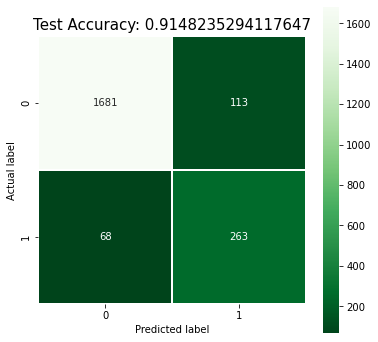

In [71]:

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(metrics.accuracy_score(y_test, prediction),".3f")
plt.title(all_sample_title, size = 15);

In [72]:
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1794
         1.0       0.70      0.79      0.74       331

    accuracy                           0.91      2125
   macro avg       0.83      0.87      0.85      2125
weighted avg       0.92      0.91      0.92      2125



In [ ]:
#Decision tree

In [ ]:
#splitting the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [73]:
#decision tree with 10 fold cross validation

from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn import tree

# Create the folds in the training data
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Iterate over max_depth
for max_depth in [1, 2, 3, 4, 5]:
    model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(model3, X_train, y_train, cv=kfold)
    print('max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean()))



max_depth=1 scores=[0.78622754 0.77664671 0.76946108 0.76872379 0.77651288] avg_score=0.7755143996010376
max_depth=2 scores=[0.76047904 0.79101796 0.78323353 0.76512882 0.78310365] avg_score=0.7765926026915612
max_depth=3 scores=[0.85508982 0.8508982  0.85808383 0.86399041 0.86518874] avg_score=0.8586502010957116
max_depth=4 scores=[0.89281437 0.89580838 0.90299401 0.89215099 0.89934092] avg_score=0.8966217355582424
max_depth=5 scores=[0.92634731 0.9251497  0.91497006 0.91551827 0.92450569] avg_score=0.9212982064630475


In [74]:
#We are proceeding with max_Depth = 3

In [75]:
#fitting with max_depth = 3
model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
result = model3.fit(X_train, y_train)

In [76]:
#accuracy on training data
prediction_train = model3.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.9306420699568759


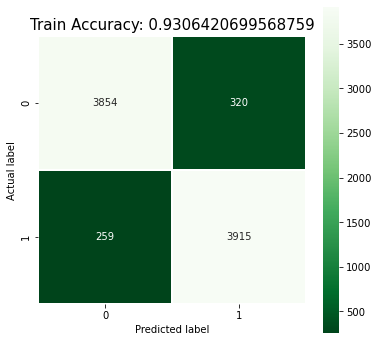

In [77]:
cm = confusion_matrix(y_train, prediction_train)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(metrics.accuracy_score(y_train, prediction_train),".3f")
plt.title(all_sample_title, size = 15);

In [78]:
#accuracy on test data
prediction = model3.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.9072941176470588


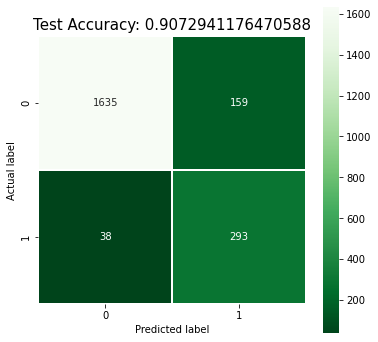

In [79]:

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(metrics.accuracy_score(y_test, prediction),".3f")
plt.title(all_sample_title, size = 15);

In [ ]:
# import graphviz

In [80]:
import graphviz
graphviz.Source(tree.export_graphviz(model3,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True)).render('Classification__decisiontree/attritions', format='png')

'Classification__decisiontree/attritions.png'

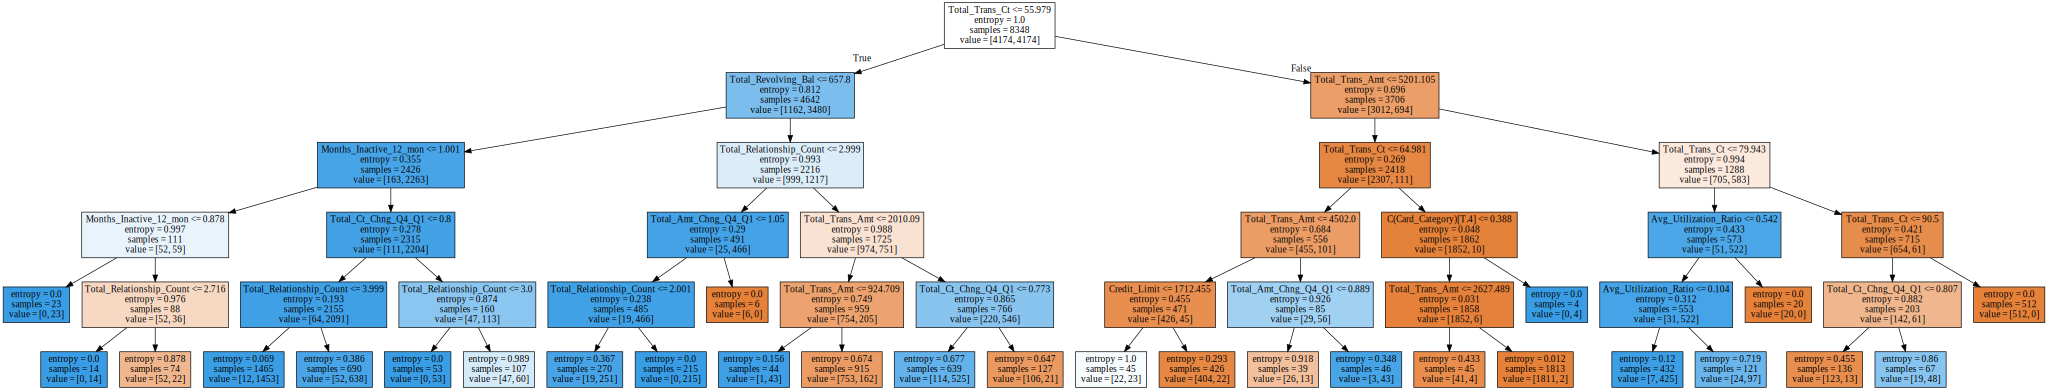

In [81]:
graphviz.Source(tree.export_graphviz(model3,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True))